In [98]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [99]:
data = pd.read_csv('./data/train.csv')

In [100]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]

x_train = x_train / 255.0
_, m_train = x_train.shape

In [102]:
def init_param():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) -0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) -0.5
    return w1, b1, w2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(z2):
    return np.exp(z2) / sum(np.exp(z2))

def forward_p(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def deriv_ReLU(z):
    return z > 0

def back_p(z1, a1, z2, a2, w1, w2, x, y):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2




In [103]:
def get_predictions(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions == y) / y.size

def grad_descent(x,  y, alpha, iterations):
    w1, b1, w2, b2 = init_param()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_p(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_p(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            print(f"Iteration: {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(a2), y)}")
    return w1, b1, w2, b2



In [104]:
w1, b1, w2, b2 = grad_descent(x_train, y_train, 0.1, 500)

Iteration: 0
[0 7 7 ... 9 7 9] [7 8 0 ... 0 7 8]
Accuracy: 0.09904878048780488
Iteration: 10
[4 4 3 ... 8 3 1] [7 8 0 ... 0 7 8]
Accuracy: 0.17502439024390243
Iteration: 20
[4 4 3 ... 0 7 1] [7 8 0 ... 0 7 8]
Accuracy: 0.25178048780487805
Iteration: 30
[4 4 3 ... 0 7 1] [7 8 0 ... 0 7 8]
Accuracy: 0.32646341463414635
Iteration: 40
[7 4 0 ... 0 7 1] [7 8 0 ... 0 7 8]
Accuracy: 0.3894878048780488
Iteration: 50
[7 4 0 ... 0 7 1] [7 8 0 ... 0 7 8]
Accuracy: 0.4381219512195122
Iteration: 60
[7 4 0 ... 0 7 1] [7 8 0 ... 0 7 8]
Accuracy: 0.4755853658536585
Iteration: 70
[7 4 0 ... 0 7 1] [7 8 0 ... 0 7 8]
Accuracy: 0.5099024390243903
Iteration: 80
[7 8 0 ... 0 7 1] [7 8 0 ... 0 7 8]
Accuracy: 0.5425121951219513
Iteration: 90
[7 8 0 ... 0 7 8] [7 8 0 ... 0 7 8]
Accuracy: 0.5699756097560975
Iteration: 100
[7 8 0 ... 5 7 8] [7 8 0 ... 0 7 8]
Accuracy: 0.5947317073170731
Iteration: 110
[7 8 0 ... 5 7 8] [7 8 0 ... 0 7 8]
Accuracy: 0.6167317073170732
Iteration: 120
[7 8 0 ... 5 7 8] [7 8 0 ... 0 7

In [105]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_p(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print(f"prediction: {prediction}")
    print(f"Label: {label}")

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = "nearest")
    plt.show()

prediction: [4]
Label: 4


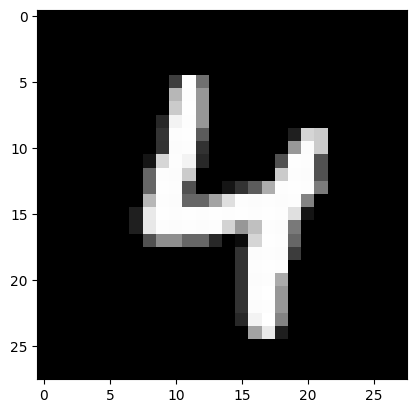

In [106]:
test_prediction(10, w1, b1, w2, b2)

In [107]:
dev_predictions = make_predictions(x_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, y_dev)

[4 4 4 1 4 1 4 4 4 2 1 8 3 4 3 0 2 4 3 0 7 1 1 8 3 4 1 2 4 1 3 5 1 2 4 0 4
 3 2 1 2 2 7 2 3 5 2 4 5 2 3 3 2 4 1 4 0 0 4 4 1 7 4 2 0 1 4 5 3 0 2 8 3 0
 1 5 4 2 8 0 5 4 3 3 3 7 5 3 1 4 2 4 7 1 3 1 2 3 4 4 3 2 3 2 1 1 2 2 2 1 4
 3 2 3 8 9 4 5 3 1 9 8 4 8 1 0 5 9 0 3 4 1 0 3 1 7 2 4 7 2 1 4 9 4 6 1 2 6
 3 4 1 5 4 4 1 7 4 5 2 8 5 2 4 8 1 3 1 1 9 7 4 4 1 2 7 3 0 8 2 2 8 0 2 0 0
 3 9 4 3 4 4 0 0 2 2 0 2 1 8 8 2 0 0 2 2 4 6 4 7 0 2 5 3 4 1 4 3 3 8 4 6 8
 0 3 8 1 0 8 1 5 4 5 3 8 4 0 3 5 3 8 4 0 0 2 4 7 4 2 2 2 2 8 1 0 0 2 0 0 4
 4 6 4 2 3 4 4 1 4 8 1 0 0 4 2 2 3 1 4 2 2 5 5 3 5 8 4 0 9 0 2 1 6 2 1 1 6
 1 2 4 7 0 2 0 4 2 3 7 3 0 0 2 7 2 2 4 2 4 3 5 7 6 3 0 2 0 1 7 7 3 1 2 1 0
 4 2 3 4 4 2 1 1 1 9 3 2 7 4 4 0 3 0 4 0 3 7 6 3 2 8 2 0 4 2 7 8 4 0 0 2 3
 4 2 3 1 7 7 3 1 5 4 0 8 8 2 4 1 1 2 0 2 4 4 0 4 4 1 2 2 6 5 8 9 2 3 8 4 0
 4 0 9 2 1 4 0 3 7 4 0 2 2 0 1 2 0 0 0 3 4 4 8 0 1 4 5 2 2 3 4 3 4 9 4 4 6
 3 1 8 4 0 2 4 7 6 9 4 4 3 4 1 1 1 4 7 0 5 0 0 3 1 0 0 2 0 2 5 4 8 2 2 3 7
 2 4 2 4 2 0 4 6 1 8 2 1 

C:\Users\liu_y\AppData\Local\Temp\ipykernel_21760\1359679491.py:12: RuntimeWarning: overflow encountered in exp
  return np.exp(z2) / sum(np.exp(z2))
C:\Users\liu_y\AppData\Local\Temp\ipykernel_21760\1359679491.py:12: RuntimeWarning: invalid value encountered in divide
  return np.exp(z2) / sum(np.exp(z2))


np.float64(0.605)